In [34]:
import numpy as np
import cv2
import os
from tensorflow.python.keras.utils import to_categorical
from matplotlib import pyplot as plt
from os import listdir
from keras.preprocessing.image import load_img, img_to_array

In [35]:
fileB = [filename for filename in listdir('/Users/akipin/opt/PelvisDataSet/broken') if not filename.startswith('.')]
fileN = [filename for filename in listdir('/Users/akipin/opt/PelvisDataSet/normal') if not filename.startswith('.')]

In [36]:
pelvisB = np.zeros((len(fileB), 256, 256, 3))
pelvisN = np.zeros((len(fileN), 256, 256, 3))

In [37]:
for i in range(0, len(fileB)):
    fnameform = '/Users/akipin/opt/PelvisDataSet/broken/%s' %fileB[i]
    pelvisB[i] = np.array(img_to_array(load_img(fnameform, target_size=(256, 256))))/255.0

In [38]:
for i in range(0, len(fileN)):
    fnameform = '/Users/akipin/opt/PelvisDataSet/normal/%s' %fileN[i]
    pelvisN[i] = np.array(img_to_array(load_img(fnameform, target_size=(256, 256))))/255.0

In [39]:
print(pelvisB.shape)
print(pelvisN.shape)

(507, 256, 256, 3)
(1115, 256, 256, 3)


In [40]:
pelvisimg_train = np.concatenate((pelvisB, pelvisN), axis=0)

In [41]:
from tensorflow.python.keras.utils import to_categorical

pelvislabelB = np.full((len(fileB), 1), 0, dtype="uint8")
pelvislabelN = np.full((len(fileN), 1), 1, dtype="uint8")

pelvislabel_train = np.concatenate((pelvislabelB, pelvislabelN), axis=0)
pelvisonehotlabel_train = to_categorical(pelvislabel_train, 2)

imageclassification = ["Broken", "Normal"]

In [42]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import Dense

model = Sequential()

model.add(
        Conv2D(
                filters = 32,
                input_shape = (256, 256, 3),
                kernel_size = (3, 3),
                strides = (1, 1),
                padding = 'same',
                activation = 'relu'
        )
)

model.add(
        Conv2D(
                filters = 32,
                kernel_size = (3, 3),
                strides = (1, 1),
                padding = 'same',
                activation = 'relu'
        )
)

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(
        Conv2D(
                filters = 64,
                kernel_size = (3, 3),
                strides = (1, 1),
                padding = 'same',
                activation = 'relu'
        )
)

model.add(
        Conv2D(
                filters = 64,
                kernel_size = (3, 3),
                strides = (1, 1),
                padding = 'same',
                activation = 'relu'
        )
)

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(
        Conv2D(
                filters = 128,
                kernel_size = (3, 3),
                strides = (1, 1),
                padding = 'same',
                activation = 'relu'
        )
)

model.add(
        Conv2D(
                filters = 128,
                kernel_size = (3, 3),
                strides = (1, 1),
                padding = 'same',
                activation = 'relu'
        )
)

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [43]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)       

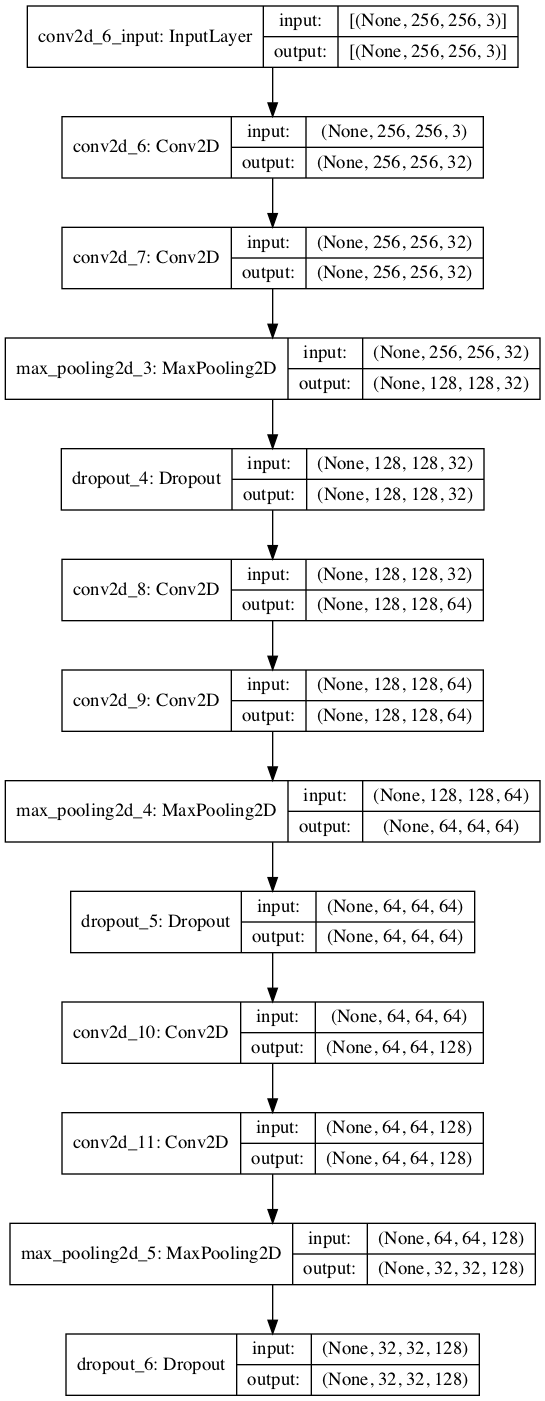

In [44]:
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    show_shapes=True,
)

In [45]:
model.add(Flatten())

model.add(Dense(units=512, activation ='relu'))

model.add(Dropout(0.5))

model.add(Dense(units = 2, activation='softmax'))

In [46]:
model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
)

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)       

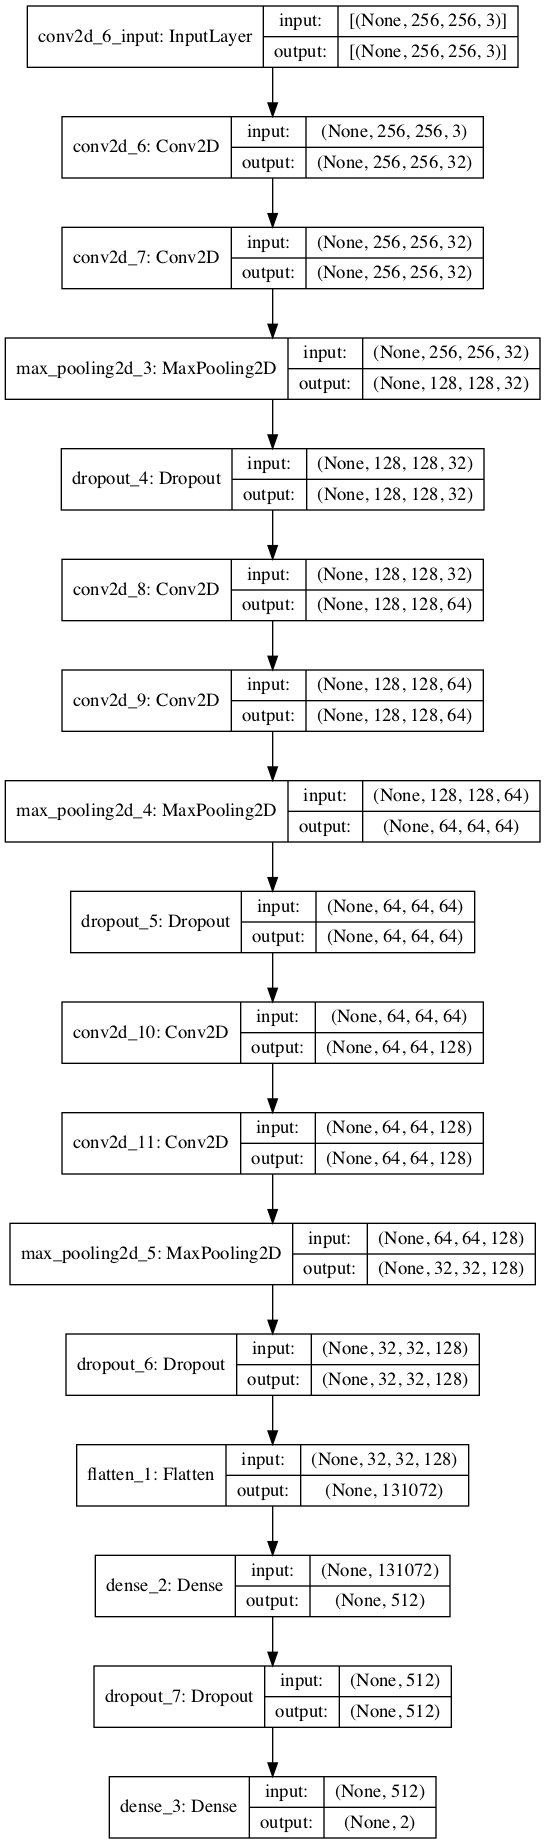

In [48]:
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    show_shapes=True,
)

In [ ]:
model_history = model.fit(
    pelvisimg_train,
    pelvisonehotlabel_train,
    batch_size = 64,
    epochs = 50,
    validation_split = 0.2
)

Train on 1297 samples, validate on 325 samples
Epoch 1/50
1297/1297 [==============================] - 153s 118ms/sample - loss: 1.0145 - acc: 0.5713 - val_loss: 0.6141 - val_acc: 1.0000
Epoch 2/50
1088/1297 [========================>.....] - ETA: 22s - loss: 0.6743 - acc: 0.6057

In [25]:
probs = model.predict(pelvisimg_train)
probs.shape

(1622, 2)

In [26]:
probs

array([[1.0000000e+00, 1.0499469e-09],
       [1.0000000e+00, 1.0499469e-09],
       [1.0000000e+00, 1.0499469e-09],
       ...,
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [27]:
import numpy as np

In [28]:
labelnum = 2
conmat = np.zeros((labelnum, labelnum))

In [29]:
for case in range(0, len(probs)):
    maxprob = probs[case, 0]
    maxprobloc = 0
    maxlabelloc = 0
    
    for i in range(0, labelnum):
        if(maxprob < probs[case, i]):
            maxprob = probs[case, i]
            maxprobloc = i
        
        if(pelvisonehotlabel_train[case, i] == 1):
            maxlabelloc = i
        
    conmat[maxlabelloc, maxprobloc] += 1

In [30]:
print(conmat)

[[ 507.    0.]
 [   0. 1115.]]


In [31]:
for cor in range(0, labelnum):
    for loc in range(0, labelnum):
        print('{:>6}'.format(int(conmat[cor, loc])), end="")
        
    print('\n')

   507     0

     0  1115



In [32]:
sum = 0.0
diag = 0.0

for cor in range(0, labelnum):
    for loc in range(0, labelnum):
         sum += conmat[cor, loc]
            
for i in range(0, labelnum):
    diag += conmat[i, i]

print('Accuracy = ', diag/sum)

Accuracy =  1.0


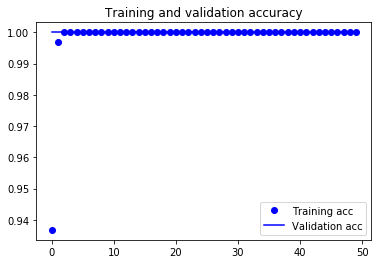

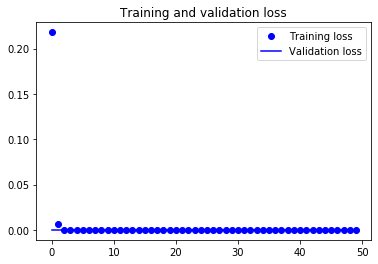

In [33]:
import matplotlib.pyplot as plt

acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()